<a href="https://colab.research.google.com/github/DIFFIDENT24/Logistic-Regression-Assignment/blob/main/LogisticRegression_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split

In [84]:
#import data
data=pd.read_csv('/content/bank-full.csv')

EDA

In [85]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [86]:
data.shape

(45211, 17)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [88]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [89]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [90]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [91]:
data1 = data.drop(['day','month','duration'], axis=1)

In [92]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,no


In [93]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  Target     45211 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


Visualisation

<Axes: xlabel='Target', ylabel='count'>

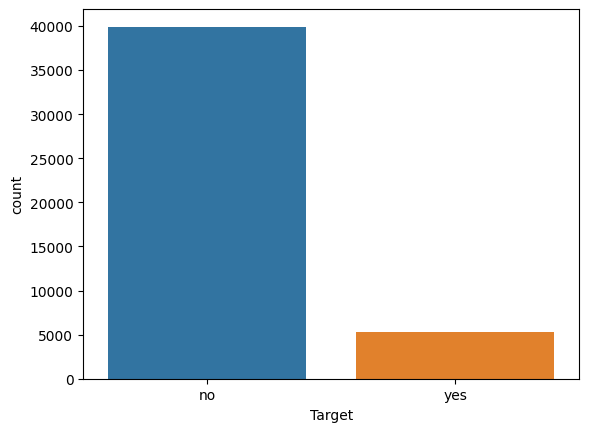

In [94]:
sns.countplot(x="Target",data=data)

<Axes: xlabel='job', ylabel='count'>

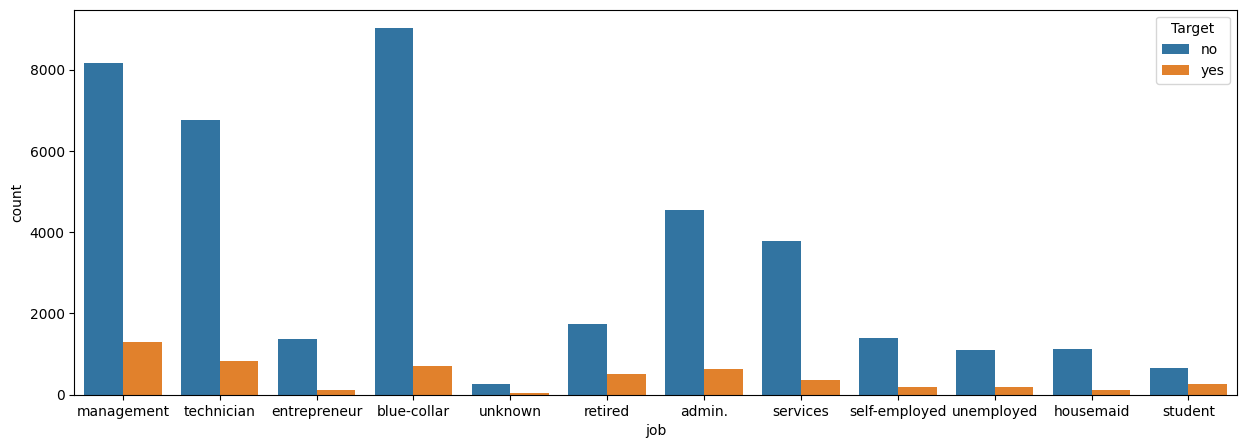

In [95]:
plt.figure(figsize=(15,5))
sns.countplot(x="job",data=data,hue = 'Target')

<Axes: xlabel='Target', ylabel='age'>

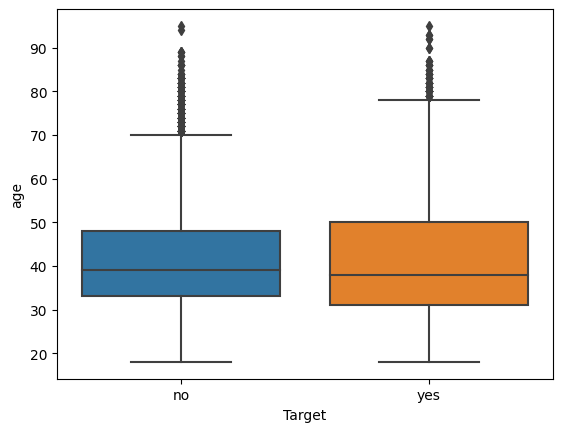

In [96]:
sns.boxplot(data=data,x='Target',y='age')

<Axes: xlabel='education', ylabel='count'>

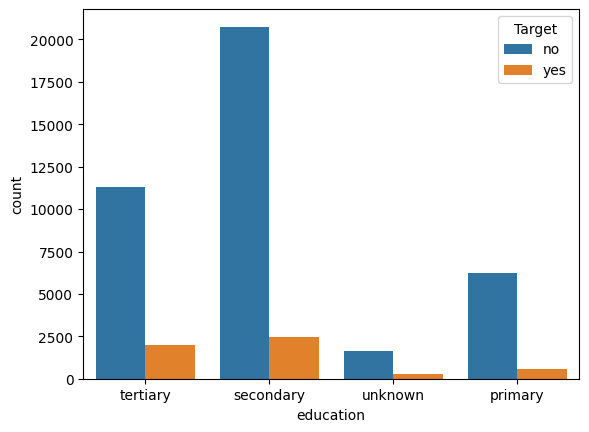

In [97]:
sns.countplot(x="education",data=data,hue = 'Target')

<Axes: xlabel='default', ylabel='count'>

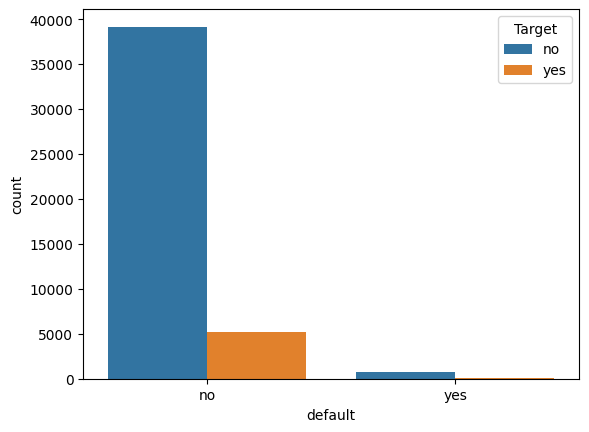

In [98]:
sns.countplot(x="default",data=data,hue = 'Target')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

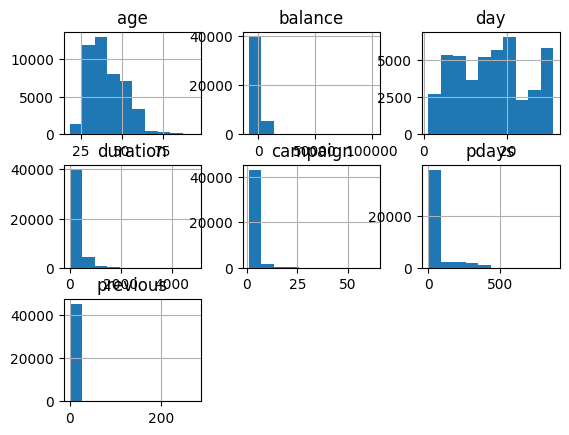

In [99]:
data.hist()

Data preprocessing

In [100]:
data[['job','marital','education','default','housing','loan','contact','poutcome','month',
       'Target']] = data[['job','marital','education','default','housing','loan','contact','poutcome','month', 'Target']].astype('category')
data1 = data

In [101]:
data1=data1.rename({'Target':'Y',},axis=1)
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [102]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [103]:
#Label Encoding

data1['month'] = data1['month'].cat.codes
data1['job'] = data1['job'].cat.codes
data1['marital'] = data1['marital'].cat.codes
data1['education'] = data1['education'].cat.codes
data1['default'] = data1['default'].cat.codes
data1['housing'] = data1['housing'].cat.codes
data1['loan'] = data1['loan'].cat.codes
data1['contact'] = data1['contact'].cat.codes
data1['poutcome'] = data1['poutcome'].cat.codes
data1['Y'] = data1['Y'].cat.codes

In [104]:
x=data1.iloc[:,:-1]
y=data1.iloc[:,16]

In [105]:
#correlation
data1.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [106]:
x1 = x.clip(lower=0)      # Replacing all negative values of x with 0

Univariant Selection using SelectKBest

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [108]:
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(x1,y)

In [109]:
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(x1.columns)

In [110]:
#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [111]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
11  duration  1.807711e+06
5    balance  7.884598e+05
13     pdays  1.171871e+05
14  previous  3.593220e+03
8    contact  1.253814e+03
12  campaign  8.405821e+02
6    housing  3.889497e+02
1        job  1.824523e+02
7       loan  1.765161e+02
9        day  1.592004e+02


In [112]:
data_x = x1[['duration', 'balance', 'pdays', 'previous', 'contact', 'campaign', 'housing', 'job', 'loan', 'day']]
data_x.head(5)

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
0,261,2143,0,0,2,1,1,4,0,5
1,151,29,0,0,2,1,1,9,0,5
2,76,2,0,0,2,1,1,2,1,5
3,92,1506,0,0,2,1,1,1,0,5
4,198,1,0,0,2,1,0,11,0,5


In [113]:
data_x.corr()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
duration,1.000000,0.021325,-0.001584,0.001203,-0.020839,-0.084570,0.005075,0.004744,-0.012412,-0.030206
balance,0.021325,1.000000,0.002627,0.016018,-0.025614,-0.014164,-0.065279,0.017850,-0.079532,0.005788
pdays,-0.001584,0.002627,1.000000,0.454288,-0.244526,-0.088508,0.124350,-0.024531,-0.022709,-0.093024
previous,0.001203,0.016018,0.454288,1.000000,-0.147811,-0.032855,0.037076,-0.000911,-0.011043,-0.051710
contact,-0.020839,-0.025614,-0.244526,-0.147811,1.000000,0.019614,0.188123,-0.082063,-0.010873,-0.027936
campaign,-0.084570,-0.014164,-0.088508,-0.032855,0.019614,1.000000,-0.023599,0.006839,0.009980,0.162490
housing,0.005075,-0.065279,0.124350,0.037076,0.188123,-0.023599,1.000000,-0.125363,0.041323,-0.027982
job,0.004744,0.017850,-0.024531,-0.000911,-0.082063,0.006839,-0.125363,1.000000,-0.033004,0.022856
loan,-0.012412,-0.079532,-0.022709,-0.011043,-0.010873,0.009980,0.041323,-0.033004,1.000000,0.011370
day,-0.030206,0.005788,-0.093024,-0.051710,-0.027936,0.162490,-0.027982,0.022856,0.011370,1.000000


Model Building

In [114]:
classifier1 = smf.Logit(y, data_x).fit()

Optimization terminated successfully.
         Current function value: 0.292027
         Iterations 8


In [115]:
classifier1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45201
Method:                           MLE   Df Model:                            9
Date:                Wed, 19 Apr 2023   Pseudo R-squ.:                  0.1908
Time:                        09:44:59   Log-Likelihood:                -13203.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.0033   5.71e-05     57.265      0.000       0.003       0.003
balance     -1.06e-05   4.92e-06     -2.154      0.031   -2.03e-05   -9.55e-07
pdays          0.0007      0.000      4.418      0.000       0.000       0.001
previous       0.0633      0.008      7.973      0.000       0.048       0.079
contact       -0.7889      0.025    -32.092      0.000      -0.837      -0.741
campaign      -0.3301      0.011    -28.950      0.000      -0.352      -0.308
housing       -1.4508      0.034    -42.724      0.000      -1.517      -1.384
job           -0.0937      0.005    -20.621      0.000      -0.103      -0.085
loan          -1.0626      0.055    -19.331      0.000      -1.170      -0.955
day           -0.0517      0.002    -30.179      0.000      -0.055      -0.048
==============================================================================
"""

In [116]:
y_pred1 = classifier1.predict(data_x)
y_pred1.head()

0    0.040651
1    0.018576
2    0.009769
3    0.031490
4    0.072443
dtype: float64

In [117]:
y_pred1 = list(map(round, y_pred1))
y_pred1 = pd.DataFrame(y_pred1)

In [118]:
prediction1 = pd.concat([y,y_pred1], axis = 1)
prediction1.head()

,Y,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [119]:
prediction1.tail()

,Y,0
45206,1,1
45207,1,0
45208,1,1
45209,0,0
45210,0,1


In [120]:
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(data_x)
scaled_x = scalar.transform(data_x)
scaled_x

array([[5.30703538e-02, 2.09836772e-02, 0.00000000e+00, ...,
        3.63636364e-01, 0.00000000e+00, 1.33333333e-01],
       [3.07035380e-02, 2.83960167e-04, 0.00000000e+00, ...,
        8.18181818e-01, 0.00000000e+00, 1.33333333e-01],
       [1.54534364e-02, 1.95834598e-05, 0.00000000e+00, ...,
        1.81818182e-01, 1.00000000e+00, 1.33333333e-01],
       ...,
       [2.29158194e-01, 5.59597364e-02, 2.11251435e-01, ...,
        4.54545455e-01, 0.00000000e+00, 5.33333333e-01],
       [1.03294022e-01, 6.54087558e-03, 0.00000000e+00, ...,
        9.09090909e-02, 0.00000000e+00, 5.33333333e-01],
       [7.34038227e-02, 2.90912295e-02, 2.15843858e-01, ...,
        1.81818182e-01, 0.00000000e+00, 5.33333333e-01]])

In [121]:
classifier2 = LogisticRegression()
classifier2.fit(scaled_x,y)

LogisticRegression()

In [122]:
classifier2.coef_

array([[17.72273709,  2.00537386,  2.32192876,  3.68882538, -1.16168868,
        -6.09988223, -1.03019879,  0.1610244 , -0.7190179 , -0.16780812]])

In [123]:
proba = classifier2.predict_proba(scaled_x)
proba

array([[0.97326394, 0.02673606],
       [0.98128176, 0.01871824],
       [0.99364193, 0.00635807],
       ...,
       [0.13320987, 0.86679013],
       [0.82180956, 0.17819044],
       [0.63926829, 0.36073171]])

In [124]:
y_pred2 = classifier2.predict(scaled_x)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

Model Validation

In [125]:
conf_matrix = confusion_matrix(y,y_pred2)
print(conf_matrix)

[[39265   657]
 [ 4303   986]]


In [126]:
pd.crosstab(y,y_pred2)

col_0,0,1
Y,,
0,39265,657
1,4303,986


In [127]:
accuracy = sum(y==y_pred2)/data.shape[0]           #data.shape[0] : All rows
accuracy

0.8902921855300702

In [128]:
print( classification_report(y,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.19      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



In [129]:
roc_score = roc_auc_score(y, y_pred2)
roc_score

0.584983781808067

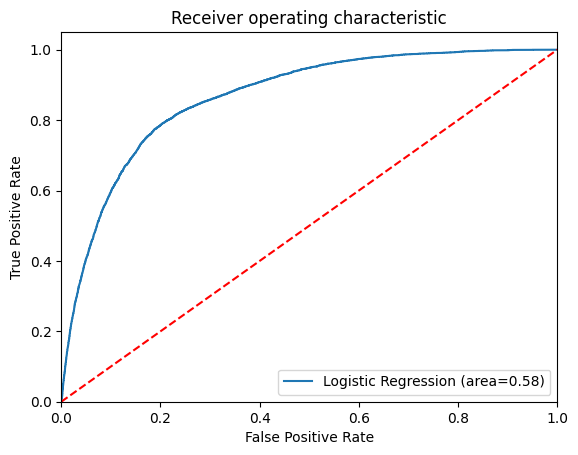

In [130]:
fpr, tpr, thresholds = roc_curve(y,proba[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score)
plt.plot([0, 1], [0, 1],'r--')     # 'r--' : red coloured dash line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [131]:
model1 = LogisticRegression(solver='saga', C=20.0, random_state=1)
model1.fit(scaled_x, y)

LogisticRegression(C=20.0, random_state=1, solver='saga')

In [132]:
new_prob = model1.predict_proba(scaled_x)
new_prob

array([[0.97466396, 0.02533604],
       [0.98294935, 0.01705065],
       [0.99446154, 0.00553846],
       ...,
       [0.1096837 , 0.8903163 ],
       [0.82672132, 0.17327868],
       [0.52685741, 0.47314259]])

In [133]:
y_pred3 = model1.predict(scaled_x)
y_pred3

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [134]:
model1.score(scaled_x, y)

0.8908451483046161

In [135]:
cr = classification_report(y,y_pred3)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



In [136]:
roc_score1 = roc_auc_score(y, y_pred3)
roc_score1

0.5938260786450008

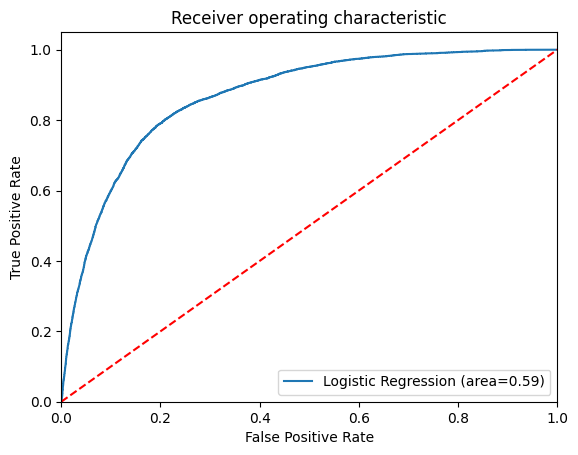

In [137]:
fpr, tpr, thresholds = roc_curve(y,new_prob[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [138]:
#Here, we got an improved model just by setting up parameters for LogisticRegression() model.
#We can see an improved score of 0.890845 and improved roc_score of 0.593826 as compared to classifier 2.

In [139]:
data_x.shape

(45211, 10)

In [140]:
y.shape

(45211,)

In [141]:
x3 = data_x.values
y3 = y.values

In [142]:
# Splitting the data for training and testing

xtrain, xtest, ytrain, ytest = train_test_split(
        x3, y3, test_size = 0.20, random_state = 10)

Standardizing 'x_train' and 'x_test'

In [143]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
 
xtrain = sc_x.fit_transform(xtrain) 

xtest = sc_x.transform(xtest)

Model Building

In [144]:
classifier3 = LogisticRegression(C = 10, random_state = 10, solver = 'lbfgs', n_jobs = 10)
classifier3.fit(xtrain, ytrain)

LogisticRegression(C=10, n_jobs=10, random_state=10)

In [145]:
LogisticRegression(C=10, n_jobs=10, random_state=10) 

LogisticRegression(C=10, n_jobs=10, random_state=10)

In [146]:
y_pred4 = classifier3.predict(xtest)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [147]:
# Printing Confusion Matrix

conf_matrix3 = confusion_matrix(ytest,y_pred4)
conf_matrix3

array([[7851,  143],
       [ 836,  213]])

In [148]:
# probability prediction for target variable
y_prob3 = classifier3.predict_proba(xtest)
y_prob3

array([[0.97617463, 0.02382537],
       [0.98889506, 0.01110494],
       [0.787309  , 0.212691  ],
       ...,
       [0.95289641, 0.04710359],
       [0.96570544, 0.03429456],
       [0.85684936, 0.14315064]])

Model Validation

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred4)

0.8917394669910428

In [150]:
roc_score3 = roc_auc_score(ytest, y_pred4)
roc_score3

0.5925810539983157

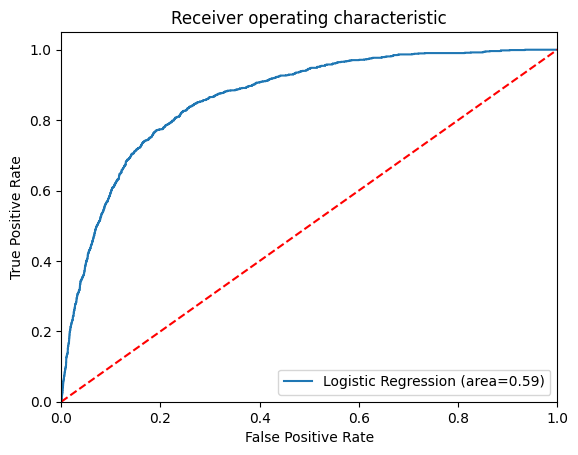

In [151]:
fpr, tpr, thresholds = roc_curve(ytest,y_prob3[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [152]:
cr3 = classification_report(ytest,y_pred4)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211

